In [1]:
#Import labraries and import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
import tensorflow as tf

In [2]:
dax40 = pd.read_csv('GER40.csv', index_col="Date", parse_dates=True)
dax40

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-21,11176.120117,11179.910156,11125.530273,11136.200195,11136.200195,65955200
2019-01-22,11076.980469,11142.219727,11034.549805,11090.110352,11090.110352,73446100
2019-01-23,11043.639648,11135.750000,11007.209961,11071.540039,11071.540039,87752900
2019-01-24,11045.639648,11149.320313,11032.530273,11130.179688,11130.179688,110548100
2019-01-25,11234.049805,11321.620117,11218.349609,11281.790039,11281.790039,99999800
...,...,...,...,...,...,...
2022-12-13,14345.879883,14675.839844,14302.490234,14497.889648,14497.889648,68062200
2022-12-14,14453.540039,14470.740234,14375.950195,14460.200195,14460.200195,59754000
2022-12-15,14351.309570,14363.120117,13982.589844,13986.230469,13986.230469,87474200


In [3]:
dax40.describe()

,Open,High,Low,Close,Adj Close,Volume
count,996.000000,996.000000,996.000000,996.000000,996.000000,9.960000e+02
mean,13418.567086,13507.123727,13323.295672,13418.855713,13418.855713,8.276485e+07
std,1541.277391,1528.917992,1551.055791,1540.529344,1540.529344,3.700313e+07
min,8495.940430,8668.480469,8255.650391,8441.709961,8441.709961,7.143000e+05
25%,12351.260254,12424.212646,12286.557373,12340.752685,12340.752685,6.127360e+07
50%,13239.405273,13307.314942,13162.594727,13236.814942,13236.814942,7.488375e+07
75%,14544.744873,14601.669922,14444.220215,14545.189942,14545.189942,9.167080e+07
max,16269.219727,16290.190430,16240.509766,16271.750000,16271.750000,3.904770e+08


In [4]:
dax40.shape

(996, 6)

In [5]:
dax40.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 996 entries, 2019-01-21 to 2022-12-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       996 non-null    float64
 1   High       996 non-null    float64
 2   Low        996 non-null    float64
 3   Close      996 non-null    float64
 4   Adj Close  996 non-null    float64
 5   Volume     996 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.5 KB


In [6]:
dax40.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
dax40[['Open', 'Close', 'High', 'Low']] = dax40[['Open', 'Close', 'High', 'Low']].apply(lambda x: round(x, 0))
dax40.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-13,14346.0,14676.0,14302.0,14498.0,14497.889648,68062200
2022-12-14,14454.0,14471.0,14376.0,14460.0,14460.200195,59754000
2022-12-15,14351.0,14363.0,13983.0,13986.0,13986.230469,87474200
2022-12-16,13978.0,14011.0,13815.0,13893.0,13893.070313,168807500
2022-12-19,13935.0,14001.0,13927.0,13943.0,13942.870117,48853600


<AxesSubplot: xlabel='Date'>

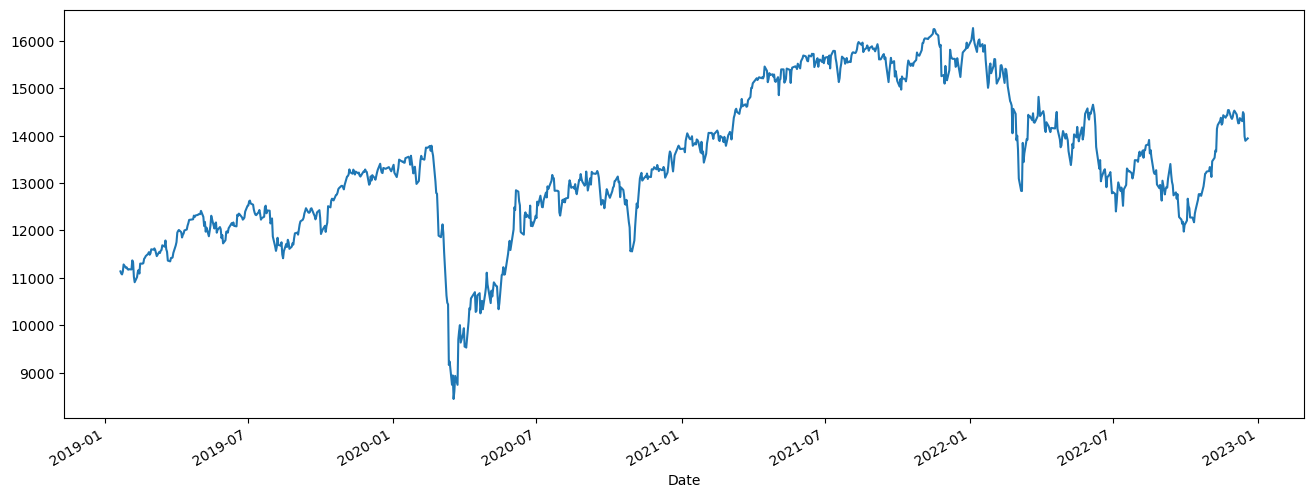

In [8]:
dax40['Close'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

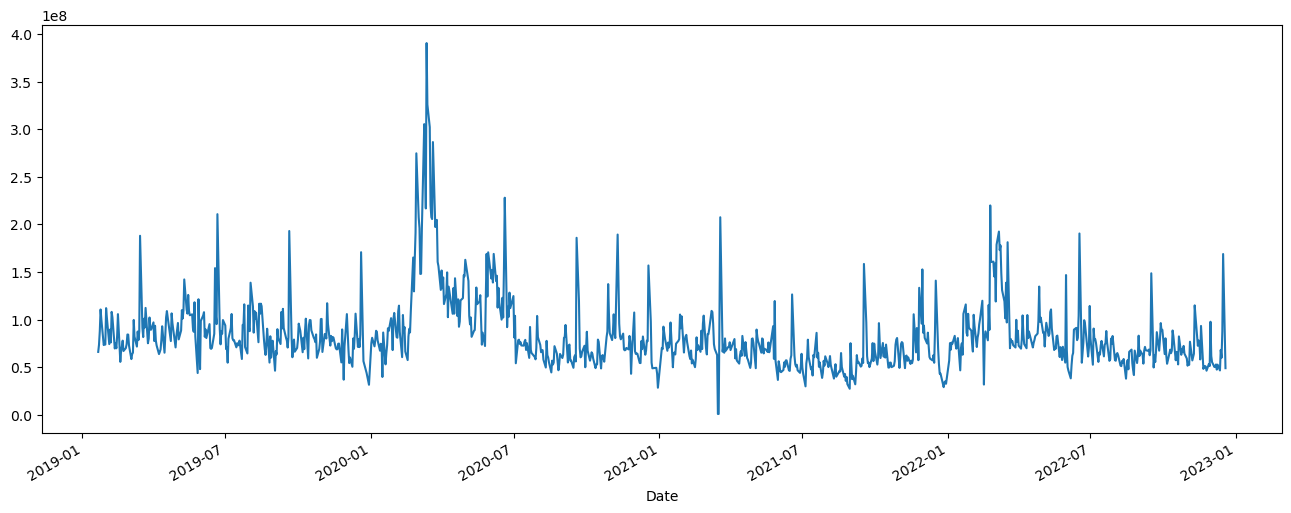

In [9]:
dax40['Volume'].plot(figsize=(16,6))

In [10]:
dax40.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-21,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-22,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-23,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-24,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,11143.142857,11211.428571,11110.571429,11162.714286,11162.708566,8.370746e+07
2019-01-30,11148.142857,11216.428571,11111.428571,11169.285714,11169.202846,8.480393e+07
2019-01-31,11174.000000,11240.571429,11113.714286,11181.142857,11181.058454,9.030380e+07


<AxesSubplot: xlabel='Date'>

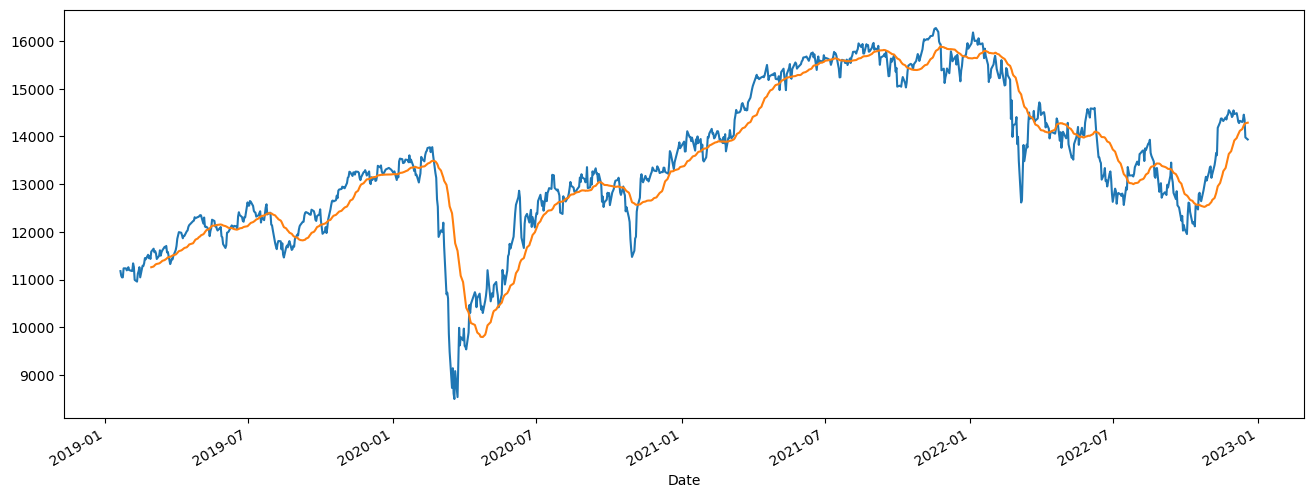

In [11]:
dax40['Open'].plot(figsize=(16,6))
dax40.rolling(window=30).mean()['Close'].plot()
#Rolling mean in orange(The moving average of the last 7 days)

In [12]:
Y = dax40[['Close']]
X = dax40[['Open', 'Volume', 'Low', 'High']]

In [13]:
#Splitting the data into tain and test data
X_train, X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [14]:
from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
model = LinearRegression()

In [15]:
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
x_train_pred = model.predict(X_train)
print('The accuracy for my training model is :', x_train_pred)

The accuracy for my training model is : [[12388.59952436]
 [12770.68997992]
 [12728.31538498]
 [13138.36109755]
 [12893.71514786]
 [13243.88872894]
 [13083.66733245]
 [13899.48451537]
 [13386.24203115]
 [13933.64651685]
 [12344.24723198]
 [10272.48214373]
 [11737.06709642]
 [13866.24148835]
 [13746.80160744]
 [14238.91689305]
 [13613.03680421]
 [13131.30897176]
 [11690.63491975]
 [14121.13942688]
 [15325.28996016]
 [15886.65678957]
 [14035.59814185]
 [14234.77529634]
 [10448.49484917]
 [12163.42153457]
 [11130.47606421]
 [15654.75933251]
 [12735.66957076]
 [15819.8424418 ]
 [12548.86243879]
 [12829.98442899]
 [13977.25577114]
 [15202.92912225]
 [11406.59433506]
 [ 8612.15754411]
 [12249.35821813]
 [14202.99295719]
 [12775.5246    ]
 [13313.33173025]
 [13236.65039762]
 [12903.65756903]
 [13263.55793661]
 [13375.32859276]
 [13079.94139867]
 [14554.36567538]
 [13128.85386124]
 [13241.46354099]
 [15269.45105436]
 [15649.5704832 ]
 [12263.5926042 ]
 [13203.99926945]
 [15196.97861473]
 [1303

In [17]:
x_test_pred = model.predict(X_test)
print('The accuracy for my testing model is :', x_test_pred)

The accuracy for my testing model is : [[11562.54787982]
 [15396.3110658 ]
 [15659.89092291]
 [15933.46042191]
 [12529.58683144]
 [13531.2971976 ]
 [13474.0932337 ]
 [16047.12503277]
 [15149.09081142]
 [12281.65952919]
 [11649.2186971 ]
 [12626.20945085]
 [13283.68572465]
 [12984.8712098 ]
 [15879.86015657]
 [13301.70882183]
 [13970.46802227]
 [11760.27016861]
 [ 8925.18504272]
 [12417.23299723]
 [13130.40710115]
 [12295.5580716 ]
 [13401.45264367]
 [14474.24651842]
 [12863.2707859 ]
 [15614.5879312 ]
 [12912.18880604]
 [12794.48741879]
 [12172.75536625]
 [13922.82862634]
 [12094.97716048]
 [15367.69946266]
 [15523.48084404]
 [13700.49122963]
 [13183.40434241]
 [11705.75027326]
 [11293.3308531 ]
 [15521.19880169]
 [13106.82976476]
 [15738.85427637]
 [15930.81220497]
 [13100.02057702]
 [12041.56769412]
 [13578.1982917 ]
 [11793.19145171]
 [13356.77160853]
 [15461.25385041]
 [15460.46866004]
 [13118.03189072]
 [15561.26275106]
 [11021.10951265]
 [15243.02277997]
 [13709.96989239]
 [13249

In [18]:
# XGBoost 
# Training Data
# R-squared Error
r2s = metrics.r2_score(Y_train, x_train_pred)
print('R-squared Error: ', r2s)

#Mean absolute error
meanerror = metrics.mean_absolute_error(Y_train, x_train_pred)
print('Mean Absolute Error: ', meanerror)

#IDk really
error2 = np.sqrt(metrics.mean_absolute_error(Y_train, x_train_pred))
print('Error: ', error2)

R-squared Error:  0.9985602094599942
Mean Absolute Error:  41.85663549011916
Error:  6.469670431337223


In [19]:
# Test Data
# R-squared Error
r2s2 = metrics.r2_score(Y_test, x_test_pred)
print('R-squared Error: ', r2s2)

#Mean absolute error
meanerror2 = metrics.mean_absolute_error(Y_test, x_test_pred)
print('Mean Absolute Error: ', meanerror2)

#IDk really
error = np.sqrt(metrics.mean_absolute_error(Y_test, x_test_pred))
print('Error: ', error)

R-squared Error:  0.998762260139123
Mean Absolute Error:  38.40944685947184
Error:  6.197535547253589


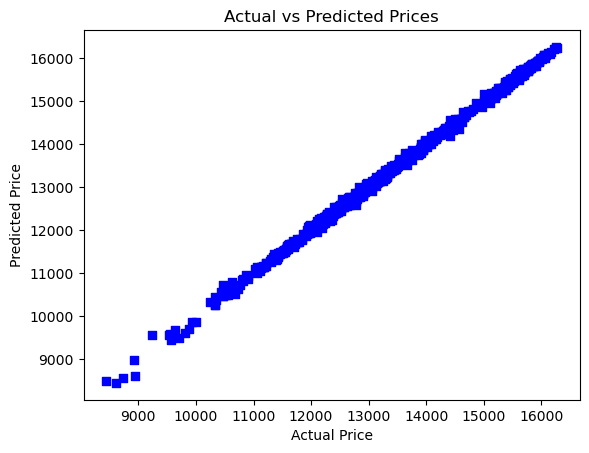

In [20]:
plt.scatter(Y_train, x_train_pred, c = "blue", marker = "s")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [21]:
X.tail()

,Open,Volume,Low,High
Date,,,,
2022-12-13,14346.0,68062200,14302.0,14676.0
2022-12-14,14454.0,59754000,14376.0,14471.0
2022-12-15,14351.0,87474200,13983.0,14363.0
2022-12-16,13978.0,168807500,13815.0,14011.0
2022-12-19,13935.0,48853600,13927.0,14001.0


In [22]:
Y.tail()

,Close
Date,
2022-12-13,14498.0
2022-12-14,14460.0
2022-12-15,13986.0
2022-12-16,13893.0
2022-12-19,13943.0


In [23]:
input_data = (13945.59, 4142658, 13905.21, 13963.78)
input_values = np.asarray(input_data)

#Reshaping the arrary to get a single result
input_data_reshaped = input_values.reshape(1, -1)

In [24]:
anticipated = model.predict(input_data_reshaped)
print("Expect price to close here :", anticipated)

Expect price to close here : [[13939.22764303]]


C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
import pickle
filename = 'ger30_model'
pickle.dump(model,open(filename,'wb'))

In [26]:
pickle.dump(model, open('ger40.pkl', 'wb'))